<a href="https://colab.research.google.com/github/aliostadi/Network-Intrusion-Detection-System-using-machine-learning/blob/main/NSL_VS_NB15_multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import Dense , Conv1D , Conv2D , LSTM , Flatten , MaxPooling1D , Dropout , GRU , SimpleRNN
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

##NSL KDD

#https://github.com/SubrataMaji/IDS-UNSW-NB15/blob/master/3.%20Preprocessing/Feature%20Engineering%20and%20Data%20Preparation.ipynb

In [ ]:
init_train_df = pd.read_csv('https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.csv',error_bad_lines=False)
init_test_df = pd.read_csv('https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.csv',error_bad_lines=False)

NameError: ignored

In [ ]:
print(init_test_df.shape,init_train_df.shape)

(22542, 43) (125972, 43)


In [ ]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'labels'
,'level'])

init_train_df.columns = columns
init_test_df.columns = columns

# sanity check
init_train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


###chek missvalue

In [ ]:
 init_train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
init_test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

###Types of Features and Scope

In [ ]:
 init_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
 init_train_df.nunique()
#dar har feature chand no adad ya class vojood darad

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [ ]:
# init_test_df.info()
# init_test_df.nunique()

#hamoon jor ke moshahede mikonid toye train 23 no hamle to sotoon target darim vali too test 36 no
##baraye sotoon service ham too train 76 no hast va tooye test 66


###Data Preprocessing


####split target to 5 class

In [ ]:
proc_train_df = init_train_df.copy()                                                                      # create a copy of our initial train set to use as our preproccessed train set.
proc_test_df = init_test_df.copy() 

In [ ]:
###be tore koli hamle haro be 4 daste taghsim mikonim
# lists to hold our attack classifications
DOS= ['back','land','neptune','pod','smurf','teardrop']
PROBE = ['ipsweep','nmap','portsweep','satan']
U2R= ['buffer_overflow','perl','loadmodule','rootkit']
R2L= ['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster']
# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','U2R','R2L']

In [ ]:
## yek func baraye daste bandi attack ha tarif mikonim
# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in DOS:
        # dos_attacks map to 1
        attack_type = 'DOS'
    elif attack in PROBE:
        # probe_attacks mapt to 2
        attack_type = 'PROBE'
    elif attack in U2R:
        # privilege escalation attacks map to 3
        attack_type = 'U2R'
    elif attack in R2L:
        # remote access attacks map to 4
        attack_type = 'R2L'
    else:
        # normal maps to 0
        attack_type = "NORMAL"
        
    return attack_type

In [ ]:
proc_train_df.shape

(125972, 43)

In [ ]:
# map the data and join to the data set
attack_map = proc_train_df.labels.apply(map_attack)
proc_train_df['attack_map'] = attack_map

test_attack_map = proc_test_df.labels.apply(map_attack)
proc_test_df['attack_map'] = test_attack_map

In [ ]:
proc_test_df.attack_map

0           DOS
1        NORMAL
2        NORMAL
3        NORMAL
4        NORMAL
          ...  
22537    NORMAL
22538    NORMAL
22539       DOS
22540    NORMAL
22541    NORMAL
Name: attack_map, Length: 22542, dtype: object

#### Visual target classes distribiution

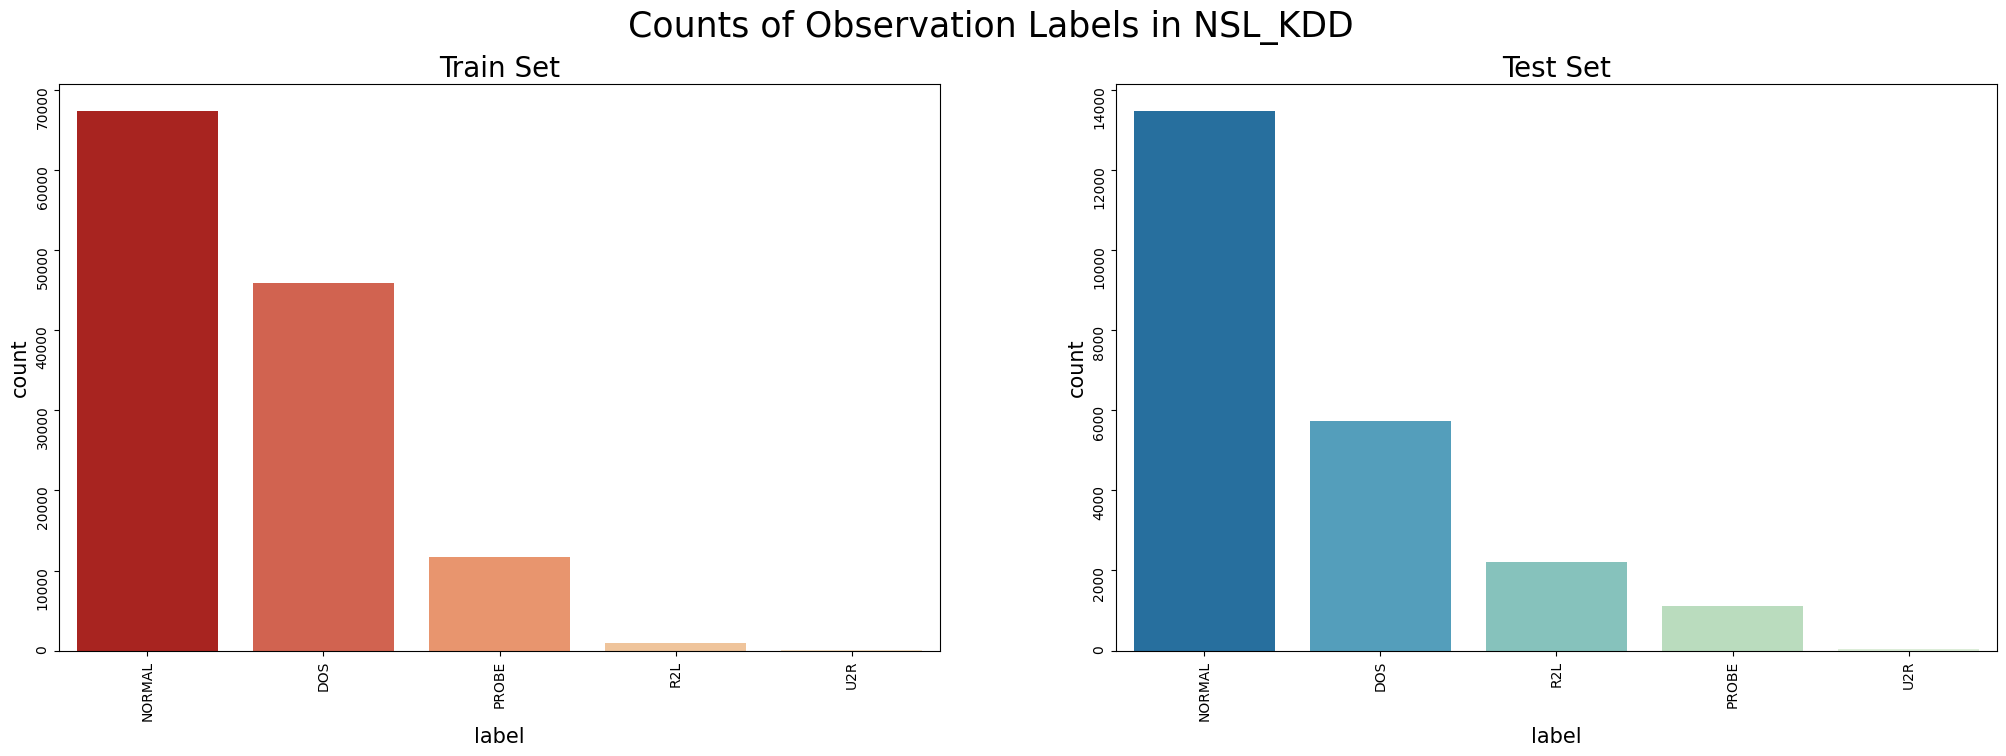

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels in NSL_KDD ', fontsize=25)

sns.countplot(x='attack_map', 
            palette="OrRd_r", 
            data=proc_train_df, 
            order=proc_train_df['attack_map'].value_counts().index,
            ax=ax1)

ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)

sns.countplot(x='attack_map', 
            palette="GnBu_r", 
            data=proc_test_df, 
            order=proc_test_df['attack_map'].value_counts().index,
            ax=ax2)

ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)

plt.show()

#nemoodar cout plot sotoon lable ro too train va test rasm kardim . do no hamle ham dar train va ham dar test nesbat
# br sayer hamle ha kheyli bishtar etefagh oftadan ke mirine to model sazi.
# to ghesmat preprocessing bayed in sotoon haro under sampling konim 

####Split data

In [ ]:
y_train= proc_train_df['attack_map'].copy()
X_train = proc_train_df.drop(['labels','attack_map','level'], axis=1)

y_test = proc_test_df['attack_map'].copy()
X_test = proc_test_df.drop(['labels','attack_map','level'], axis=1)

In [ ]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


####encode Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
le=LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
X_train_cat=X_train[['protocol_type','service','flag']]
X_test_cat=X_test[['protocol_type','service','flag']]

In [ ]:
X_train_cat, X_test_cat = prepare_inputs(X_train_cat, X_test_cat)

In [ ]:
X_train_cat

array([[ 2., 44.,  9.],
       [ 1., 49.,  5.],
       [ 1., 24.,  9.],
       ...,
       [ 1., 54.,  9.],
       [ 1., 30.,  5.],
       [ 1., 20.,  9.]])

In [ ]:
X_test_cat=pd.DataFrame(X_test_cat ,columns=['protocol_type_enc','service_enc','flag_enc'])
X_train_cat=pd.DataFrame(X_train_cat ,columns=['protocol_type_enc','service_enc','flag_enc'])

In [ ]:
X_train=X_train.drop(['protocol_type','service','flag'],axis=1)
X_test=X_test.drop(['protocol_type','service','flag'],axis=1)

In [ ]:
print(X_train.shape , X_test.shape)

(125972, 38) (22542, 38)


In [ ]:
X_train=pd.concat([X_train ,X_train_cat],axis=1)
X_test=pd.concat([X_test ,X_test_cat],axis=1)

In [ ]:
print(X_train.shape , X_test.shape)

(125972, 41) (22542, 41)


####Feature selection

[3.83041847e-03 1.62846470e-01 7.26415535e-02 2.51246196e-05
 8.42113242e-03 2.60630315e-05 6.47378639e-03 2.83311032e-04
 9.61934198e-03 5.00610382e-03 1.16839627e-04 1.38826490e-05
 1.98832704e-04 1.47937760e-04 4.32771423e-05 4.66757688e-05
 0.00000000e+00 0.00000000e+00 1.01557814e-03 4.47012364e-02
 2.28791932e-02 2.05547999e-02 2.75203218e-02 6.87242008e-03
 6.06025236e-03 1.07034905e-01 7.29552047e-02 2.99958715e-03
 2.40072125e-02 2.68678386e-02 2.63401581e-02 4.74643875e-02
 3.94414730e-02 2.35759161e-02 3.58256693e-02 2.53687680e-02
 1.90734206e-02 1.17904941e-02 2.93766659e-02 2.36480888e-02
 8.48856585e-02]


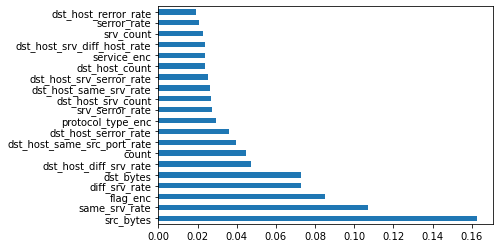

src_bytes                      0.162846
same_srv_rate                  0.107035
flag_enc                       0.084886
diff_srv_rate                  0.072955
dst_bytes                      0.072642
dst_host_diff_srv_rate         0.047464
count                          0.044701
dst_host_same_src_port_rate    0.039441
dst_host_serror_rate           0.035826
protocol_type_enc              0.029377
srv_serror_rate                0.027520
dst_host_srv_count             0.026868
dst_host_same_srv_rate         0.026340
dst_host_srv_serror_rate       0.025369
dst_host_count                 0.024007
service_enc                    0.023648
dst_host_srv_diff_host_rate    0.023576
srv_count                      0.022879
serror_rate                    0.020555
dst_host_rerror_rate           0.019073
dtype: float64


In [ ]:
# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
# determine 20 most important features
df_imp_feat= feat_importances.nlargest(20)
print(rf_model.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [ ]:
X_train=X_train[['src_bytes','same_srv_rate','dst_bytes','flag_enc','dst_host_diff_srv_rate','count','diff_srv_rate','serror_rate',
'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_same_src_port_rate','protocol_type_enc','srv_count','srv_serror_rate','dst_host_srv_count','service_enc','dst_host_srv_diff_host_rate',
'dst_host_rerror_rate','dst_host_same_srv_rate','dst_host_count'
]]

X_test=X_test[['src_bytes','same_srv_rate','dst_bytes','flag_enc','dst_host_diff_srv_rate','count','diff_srv_rate','serror_rate',
'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_same_src_port_rate','protocol_type_enc','srv_count','srv_serror_rate','dst_host_srv_count','service_enc','dst_host_srv_diff_host_rate',
'dst_host_rerror_rate','dst_host_same_srv_rate','dst_host_count'
]]

In [ ]:
print(X_train.shape, X_test.shape)

(125972, 20) (22542, 20)


####Normalizing Data

In [ ]:
##hala nobat be oon mirese sotoon haye integer ro normal konim .ba estefade az log transform in karo anjam midim

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   src_bytes                    125972 non-null  int64  
 1   same_srv_rate                125972 non-null  float64
 2   dst_bytes                    125972 non-null  int64  
 3   flag_enc                     125972 non-null  float64
 4   dst_host_diff_srv_rate       125972 non-null  float64
 5   count                        125972 non-null  int64  
 6   diff_srv_rate                125972 non-null  float64
 7   serror_rate                  125972 non-null  float64
 8   dst_host_serror_rate         125972 non-null  float64
 9   dst_host_srv_serror_rate     125972 non-null  float64
 10  dst_host_same_src_port_rate  125972 non-null  float64
 11  protocol_type_enc            125972 non-null  float64
 12  srv_count                    125972 non-null  int64  
 13 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
y_test,y_train=pd.DataFrame(y_test),pd.DataFrame(y_train)

####SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape , y_train.shape
      )

(336710, 20) (336710, 1)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)

In [ ]:
X_train, y_train = rus.fit_resample(X_train, y_train)
print(X_train.shape , y_train.shape)

(336710, 20) (336710, 1)


###Models

In [ ]:
def fitandeval(model,x_train,yy_train,x_test,yy_test):
  model.fit(x_train,yy_train)
  y_pred=model.predict(x_test)
  f1score=f1_score(yy_test, y_pred, average="macro")
  W_f1score=f1_score(yy_test, y_pred, average="weighted")
  
  
 

  return f1score,W_f1score

#####Random Forest

In [ ]:
RF_NSL=RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
f1score_RF_NSL , W_f1score_RF_NSL=fitandeval(RF_NSL,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
W_f1score_RF_NSL

0.8304133931377974

#####Decision Tree

In [ ]:
DT_NSL = DecisionTreeClassifier(criterion='gini',max_depth=30) 

In [ ]:
f1score_DT_NSL , W_f1score_DT_NSL=fitandeval(DT_NSL,X_train,y_train,X_test,y_test)

In [ ]:
W_f1score_DT_NSL

0.7712872707190565

#####Navie Bays

In [ ]:
NB_NSL= GaussianNB()

In [ ]:
f1score_NB_NSL , W_f1score_NB_NSL=fitandeval(NB_NSL,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
W_f1score_NB_NSL

0.7109699191990727

#####SVM

In [ ]:
SVM_NSL= SVC(kernel='rbf')

In [ ]:
f1score_SVM_NSL, W_f1score_SVM_NSL=fitandeval(SVM_NSL,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
W_f1score_SVM_NSL

0.8120445350381381

####W_f1score_SVM_NSL=0.8120445350381381

#####MLP

In [ ]:
MLP_NSL= Sequential()
    
    #here 30 is output dimension
MLP_NSL.add(Dense(100,input_dim =X_train.shape[1],activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
MLP_NSL.add(Dense(100,activation='relu',kernel_initializer='random_uniform'))
MLP_NSL.add(Dense(100,activation='relu',kernel_initializer='random_uniform'))

    
    #5 classes-normal,dos,probe,r2l,u2r
MLP_NSL.add(Dense(10,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
MLP_NSL.compile(loss ='sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    

In [ ]:


MLP_NSL.fit(X_train,y_train,epochs=100,batch_size=32)


In [ ]:

y_pred_MLP_NSL = MLP_NSL.predict(X_test)


In [ ]:
y_pred_MLP_NSL= np.argmax(y_pred_MLP_NSL,axis=1)


In [ ]:
print(y_test.shape , y_pred_MLP_NSL.shape)

In [ ]:
f1score_MLP_NSL=f1_score(y_test, y_pred_MLP_NSL , average="macro")
W_f1score_MLP_NSL=f1_score(y_test ,y_pred_MLP_NSL , average="weighted")

In [ ]:
print(f1score_MLP_NSL ,W_f1score_MLP_NSL)


In [ ]:
f1score_MLP_NSL ,W_f1score_MLP_NSL=0.5506752051194097 , 0.815032783557662

#####result

In [ ]:
dic4={"F1 score":[("{:.6f}".format(f1score_RF_NSL)),("{:.6f}".format(f1score_DT_NSL)),("{:.6f}".format(f1score_NB_NSL))
       ,("{:.6f}".format(f1score_SVM_NSL)),("{:.6f}".format(f1score_MLP_NSL))],
      
     "Weighted F1 score":[("{:.6f}".format(W_f1score_RF_NSL)),("{:.6f}".format(W_f1score_DT_NSL)),("{:.6f}".format(W_f1score_NB_NSL))
       ,("{:.6f}".format(W_f1score_SVM_NSL)),("{:.6f}".format(W_f1score_MLP_NSL))]}

       
main_data3 = pd.DataFrame.from_dict( dic4 , orient='index')
main_data3.columns=['Random Forest', 'Decision Tree','Navie Bays','SVM','MLP']
main_data3 = main_data3.T
main_data3

,F1 score,Weighted F1 score
Random Forest,0.571730,0.830413
Decision Tree,0.481826,0.771287
Navie Bays,0.490695,0.710970
SVM,0.557043,0.812045
MLP,0.550675,0.815033


In [ ]:
dic2={
      "Fandom Forest"      :("{:.6f}".format(W_f1score_RF_NSL)),
      "Decision Tree"   :("{:.6f}".format(W_f1score_DT_NSL)),
      "Navie Bays" :("{:.6f}".format(W_f1score_NB_NSL)),
      "SVM" :("{:.6f}".format(W_f1score_SVM_NSL)),
      "MLP" :("{:.6f}".format(W_f1score_MLP_NSL)),
      
      }

evaluation_train_loss_ANOVA = pd.DataFrame.from_dict(dic2, orient='index', columns=["Weighted F1_Score"] )
evaluation_train_loss_ANOVA

,Weighted F1_Score
Fandom Forest,0.830413
Decision Tree,0.771287
Navie Bays,0.710970
SVM,0.812045
MLP,0.815033


Text(0.5, 1.0, 'Weighted F1 score')

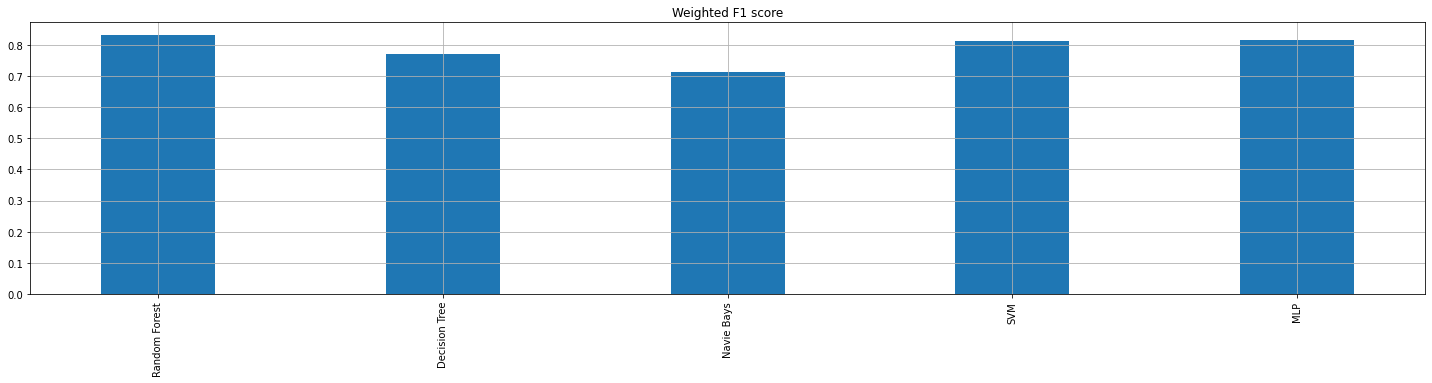

In [ ]:
from matplotlib.pyplot import plot
f, ax = plt.subplots(figsize=(25,5)) # set the size that you'd like (width, height)
main_data3["Weighted F1 score"] = main_data3['Weighted F1 score'].astype(float)
main_data3["Weighted F1 score"] .plot(kind="bar", grid=True , width=0.4,)
plt.title('Weighted F1 score')

##NB15

In [ ]:
dataset2_test=pd.read_csv('/content/drive/MyDrive/پزوژه ها/UNSW_NB15_testing-set (1).csv')
dataset2_train=pd.read_csv('/content/drive/MyDrive/پزوژه ها/UNSW_NB15_training-set.csv')

In [ ]:
print(dataset2_train.shape, dataset2_test.shape)

(82332, 45) (175341, 45)


In [ ]:
dataset2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
dataset2_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
dataset2_train.nunique()

id                   82332
dur                  39888
proto                  131
service                 13
state                    7
spkts                  420
dpkts                  436
sbytes                4489
dbytes                4034
rate                 40616
sttl                    11
dttl                     8
sload                42873
dload                40614
sloss                  253
dloss                  311
sinpkt               39970
dinpkt               37617
sjit                 39944
djit                 38381
swin                    11
stcpb                39219
dtcpb                39108
dwin                    14
tcprtt               26130
synack               24934
ackdat               24020
smean                 1282
dmean                 1222
trans_depth              8
response_body_len     1190
ct_srv_src              57
ct_state_ttl             7
ct_dst_ltm              50
ct_src_dport_ltm        50
ct_dst_sport_ltm        33
ct_dst_src_ltm          57
i

In [ ]:
dataset2_test.nunique()

id                   175341
dur                   74039
proto                   133
service                  13
state                     9
spkts                   480
dpkts                   443
sbytes                 7214
dbytes                 6660
rate                  76991
sttl                     11
dttl                      6
sload                 80885
dload                 77474
sloss                   409
dloss                   370
sinpkt                76161
dinpkt                74245
sjit                  77532
djit                  76831
swin                     13
stcpb                 75265
dtcpb                 75089
dwin                      7
tcprtt                43319
synack                40142
ackdat                37708
smean                  1357
dmean                  1328
trans_depth              11
response_body_len      2386
ct_srv_src               52
ct_state_ttl              5
ct_dst_ltm               50
ct_src_dport_ltm         47
ct_dst_sport_ltm    

In [ ]:
dataset2_train.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

####check missvalue

In [ ]:
dataset2_train.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
dataset2_test.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

####remove unusfull features

In [ ]:
dataset2_train_cat=dataset2_train.drop(['label','id'],axis=1)
dataset2_test_cat=dataset2_test.drop(['label','id'],axis=1)

####visual target class distribiution

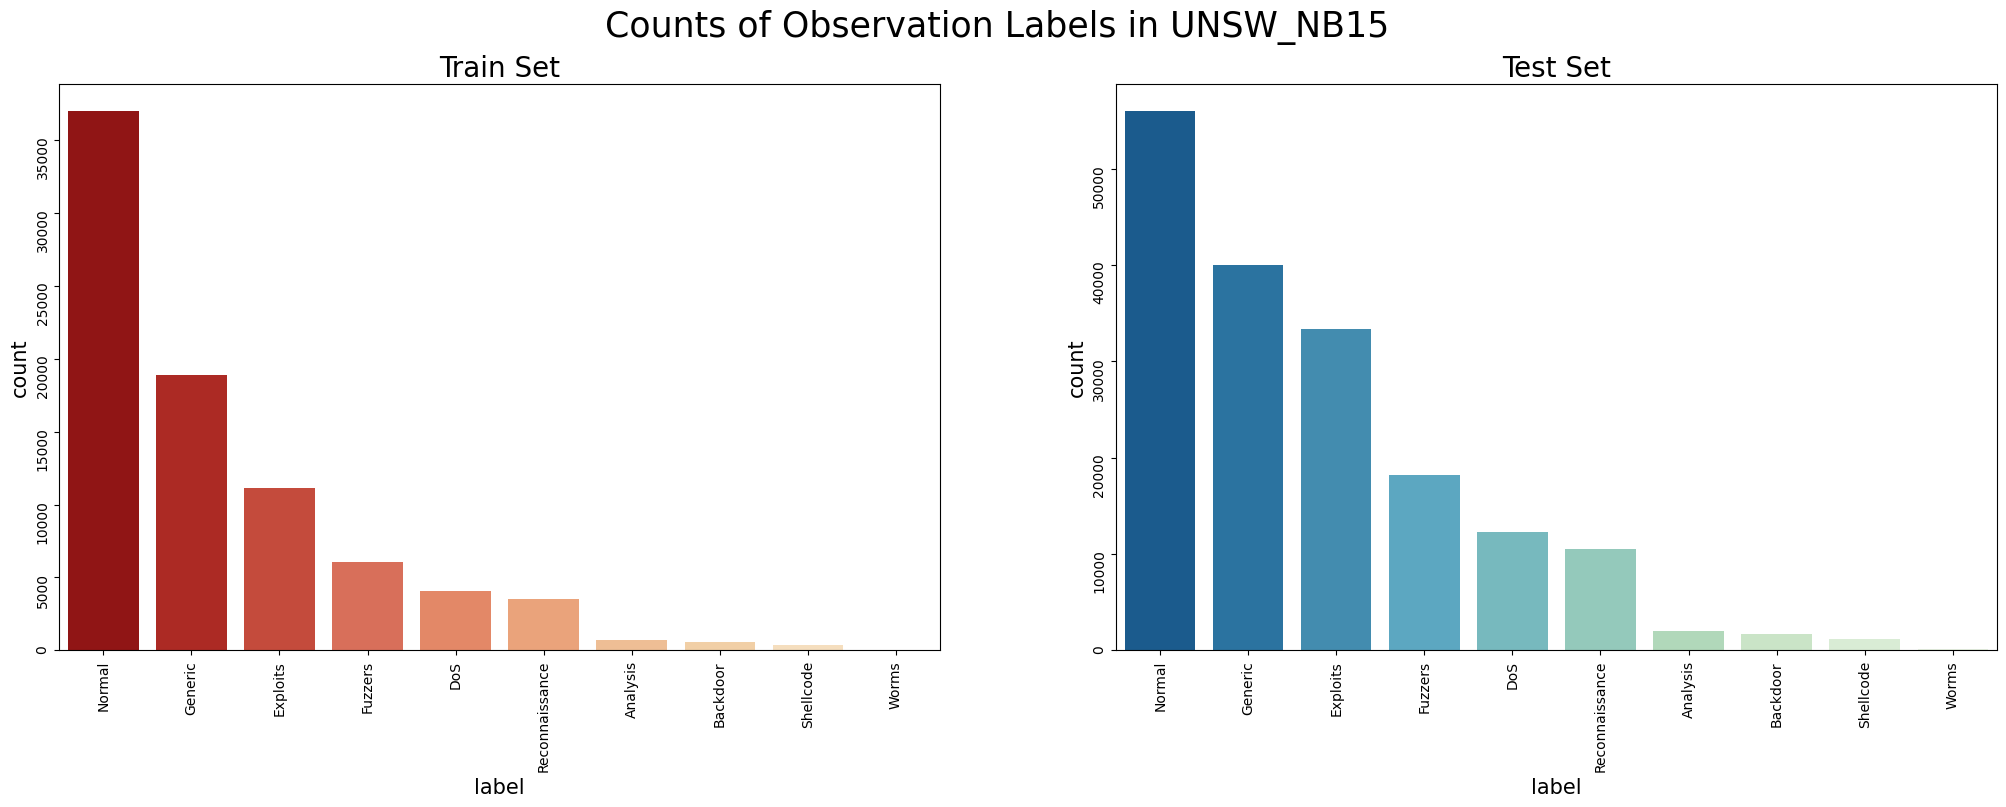

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels in UNSW_NB15', fontsize=25)

sns.countplot(x="attack_cat", 
            palette="OrRd_r", 
            data=dataset2_train_cat, 
            order=dataset2_train_cat['attack_cat'].value_counts().index,
            ax=ax1)

ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)

sns.countplot(x="attack_cat", 
            palette="GnBu_r", 
            data=dataset2_test_cat, 
            order=dataset2_test_cat['attack_cat'].value_counts().index,
            ax=ax2)

ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)

plt.show()

####Split X and y

In [ ]:
X2_train=dataset2_train_cat.iloc[:,:-1]
X2_test=dataset2_test_cat.iloc[:,:-1]
y2_test=dataset2_test_cat.iloc[:,-1]
y2_train=dataset2_train_cat.iloc[:,-1]
print(X2_train.shape ,X2_test.shape ,y2_train.shape , y2_test.shape)

(82332, 42) (175341, 42) (82332,) (175341,)


####encode Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
le=LabelEncoder()
le.fit(y2_train)
y2_train=le.transform(y2_train)
y2_test=le.transform(y2_test)

In [ ]:
print( y2_train.shape , y2_test.shape)

(82332,) (175341,)


In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.fit_transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
X2_test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0


In [ ]:
X2_train_cat=X2_train[['proto', 'service', 'state']]
X2_test_cat=X2_test[['proto', 'service', 'state']]

In [ ]:
X2_train_cat, X2_test_cat = prepare_inputs(X2_train_cat, X2_test_cat)

In [ ]:
X2_train_cat

array([[117.,   0.,   4.],
       [117.,   0.,   4.],
       [117.,   0.,   4.],
       ...,
       [  6.,   0.,   4.],
       [  6.,   0.,   4.],
       [117.,   0.,   4.]])

In [ ]:
X2_test_cat=pd.DataFrame(X2_test_cat ,columns=['proto_encode', 'service_encode', 'state_encode'])
X2_train_cat=pd.DataFrame(X2_train_cat ,columns=['proto_encode', 'service_encode', 'state_encode'])

In [ ]:
X2_train=X2_train.drop(['proto', 'service', 'state'],axis=1)
X2_test=X2_test.drop(['proto', 'service', 'state'],axis=1)

In [ ]:
print(X2_train.shape , X2_test.shape)

(82332, 39) (175341, 39)


In [ ]:
X2_train=pd.concat([X2_train ,X2_train_cat],axis=1)
X2_test=pd.concat([X2_test ,X2_test_cat],axis=1)

In [ ]:
print(X2_train.shape , X2_test.shape)

(82332, 42) (175341, 42)


In [ ]:
y2_test.shape

(175341,)

####Feature selection

In [ ]:
print(X2_train.shape , y2_train.shape)

(82332, 42) (82332,)


[3.62680030e-02 9.01948677e-03 1.93174500e-02 1.13608649e-01
 3.60828091e-02 3.14534871e-02 3.79994559e-02 1.90573331e-02
 5.25257031e-02 2.19681567e-02 8.52618653e-03 9.20823920e-03
 1.76180585e-02 2.50129100e-02 1.24736356e-02 1.01926665e-02
 5.15019212e-03 6.56669345e-03 6.62485635e-03 2.31497509e-04
 1.48494037e-02 1.48988932e-02 1.54620021e-02 6.79465327e-02
 2.71491518e-02 1.94695176e-03 3.70600292e-03 3.54769207e-02
 1.37770119e-02 1.81035792e-02 2.57955228e-02 6.53821994e-02
 6.05173663e-02 6.77919222e-05 1.12291785e-04 2.24561841e-03
 1.18687942e-02 5.25561217e-02 3.18219166e-04 1.97448188e-02
 6.04809753e-02 8.68836085e-03]


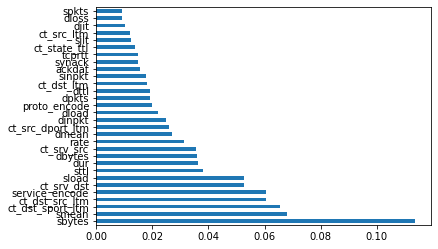

sbytes              0.113609
smean               0.067947
ct_dst_sport_ltm    0.065382
ct_dst_src_ltm      0.060517
service_encode      0.060481
ct_srv_dst          0.052556
sload               0.052526
sttl                0.037999
dur                 0.036268
dbytes              0.036083
ct_srv_src          0.035477
rate                0.031453
dmean               0.027149
ct_src_dport_ltm    0.025796
dinpkt              0.025013
dload               0.021968
proto_encode        0.019745
dpkts               0.019317
dttl                0.019057
ct_dst_ltm          0.018104
sinpkt              0.017618
ackdat              0.015462
synack              0.014899
tcprtt              0.014849
ct_state_ttl        0.013777
sjit                0.012474
ct_src_ltm          0.011869
djit                0.010193
dloss               0.009208
spkts               0.009019
dtype: float64


In [ ]:
# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X2_train,y2_train)
feat_importances = pd.Series(rf_model.feature_importances_, index=X2_train.columns)
# determine 20 most important features
df_imp_feat= feat_importances.nlargest(30)
print(rf_model.feature_importances_)


# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [ ]:
X2_train=X2_train[['ct_src_ltm','ackdat','dttl','djit','sjit','dloss','ct_dst_ltm','synack','sinpkt','state_encode','tcprtt','dinpkt',
   'dload', 'proto_encode', 'dpkts','ct_src_dport_ltm', 'dmean' , 'ct_state_ttl','dbytes', 'dur','sttl','ct_srv_src', 'rate', 'ct_dst_sport_ltm'
   ,'sload', 'service_encode', 'ct_srv_dst', 'ct_dst_src_ltm', 'smean', 'sbytes' 
]]

X2_test=X2_test[['ct_src_ltm','ackdat','dttl','djit','sjit','dloss','ct_dst_ltm','synack','sinpkt','state_encode','tcprtt','dinpkt',
   'dload', 'proto_encode', 'dpkts','ct_src_dport_ltm', 'dmean' , 'ct_state_ttl','dbytes', 'dur','sttl','ct_srv_src', 'rate', 'ct_dst_sport_ltm'
   ,'sload', 'service_encode', 'ct_srv_dst', 'ct_dst_src_ltm', 'smean', 'sbytes'
]]

In [ ]:
print(X2_train.shape, X2_test.shape)

(82332, 30) (175341, 30)


####Normalizing Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(X2_train)
X2_train=scaler2.transform(X2_train)
X2_test=scaler2.transform(X2_test)

In [ ]:
y2_test,y2_train=pd.DataFrame(y2_test),pd.DataFrame(y2_train)

####SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [ ]:
oversample = SMOTE()
X2_train, y2_train = oversample.fit_resample(X2_train, y2_train)

In [ ]:
print(X2_train.shape , y2_train.shape
      )

(370000, 30) (370000, 1)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)

In [ ]:
X2_train, y2_train = rus.fit_resample(X2_train, y2_train)
print(X2_train.shape , y2_train.shape)

(370000, 30) (370000, 1)


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
def fitandeval(model,x_train,yy_train,x_test,yy_test):
  model.fit(x_train,yy_train)
  y_pred=model.predict(x_test)
  f1score=f1_score(yy_test, y_pred, average="macro")
  W_f1score=f1_score(yy_test, y_pred, average="weighted")
  
  
 

  return f1score,W_f1score

###Models

#####Random Forest

In [ ]:
RF_NB=RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
f1score_RF_NB , W_f1score_RF_NB=fitandeval(RF_NB,X2_train,y2_train,X2_test,y2_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
W_f1score_RF_NB

0.7278668246634743

#####Decision Tree

In [ ]:
DT_NB = DecisionTreeClassifier(criterion='gini',max_depth=30) 

In [ ]:
f1score_DT_NB , W_f1score_DT_NB=fitandeval(DT_NB,X2_train,y2_train,X2_test,y2_test)

In [ ]:
W_f1score_DT_NB

0.7048137981850573

#####Navie Bays

In [ ]:
NB_NB= GaussianNB()

In [ ]:
f1score_NB_NB , W_f1score_NB_NB=fitandeval(NB_NB,X2_train,y2_train,X2_test,y2_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
W_f1score_NB_NB

0.5701926563735004

#####SVM

In [ ]:
SVM_NB = SVC(kernel='rbf')

In [ ]:
f1score_SVM_NB , W_f1score_SVM_NB=fitandeval(SVM_NB,X2_train,y2_train,X2_test,y2_test)

In [ ]:
f1score_SVM_NB

In [ ]:
f1score_SVM_NB , W_f1score_SVM_NB=0.5333,0.713264

#####MLP

In [ ]:
MLP_NB= Sequential()
    
    #here 30 is output dimension
MLP_NB.add(Dense(100,input_dim =X2_train.shape[1],activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
MLP_NB.add(Dense(100,activation='relu',kernel_initializer='random_uniform'))
MLP_NB.add(Dense(100,activation='relu',kernel_initializer='random_uniform'))

    
    #5 classes-normal,dos,probe,r2l,u2r
MLP_NB.add(Dense(10,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
MLP_NB.compile(loss ='sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    

In [ ]:


MLP_NB.fit(X2_train,y2_train,epochs=100,batch_size=32)


Epoch 1/100
11563/11563 [==============================] - 31s 3ms/step - loss: 0.8097 - accuracy: 0.6911
Epoch 2/100
11563/11563 [==============================] - 29s 3ms/step - loss: 0.6648 - accuracy: 0.7389
Epoch 3/100
11563/11563 [==============================] - 30s 3ms/step - loss: 0.6278 - accuracy: 0.7498
Epoch 4/100
11563/11563 [==============================] - 29s 3ms/step - loss: 0.6044 - accuracy: 0.7575
Epoch 5/100
11563/11563 [==============================] - 29s 2ms/step - loss: 0.5882 - accuracy: 0.7635
Epoch 6/100
11563/11563 [==============================] - 29s 2ms/step - loss: 0.5752 - accuracy: 0.7674
Epoch 7/100
11563/11563 [==============================] - 29s 3ms/step - loss: 0.5650 - accuracy: 0.7715
Epoch 8/100
11563/11563 [==============================] - 29s 2ms/step - loss: 0.5553 - accuracy: 0.7749
Epoch 9/100
11563/11563 [==============================] - 28s 2ms/step - loss: 0.5478 - accuracy: 0.7778
Epoch 10/100
11563/11563 [====================

In [ ]:

y_pred_MLP_NB = MLP_NB.predict(X2_test)


In [ ]:
y_pred_MLP_NB= np.argmax(y_pred_MLP_NB,axis=1)


In [ ]:
print(y2_test.shape , y_pred_MLP_NB.shape)

(175341, 1) (175341,)


In [ ]:
f1score_MLP_NB=f1_score(y2_test, y_pred_MLP_NB , average="macro")
W_f1score_MLP_NB=f1_score(y2_test ,y_pred_MLP_NB , average="weighted")

In [ ]:
print(f1score_MLP_NB ,W_f1score_MLP_NB)


0.3579437211341394 0.6667103368857892


In [ ]:
f1score_MLP_NB ,W_f1score_MLP_NB=0.3579437211341394 , 0.6667103368857892

#####result

In [ ]:
dic4={"F1 score":[("{:.6f}".format(f1score_RF_NB)),("{:.6f}".format(f1score_DT_NB)),("{:.6f}".format(f1score_NB_NB))
       ,("{:.6f}".format(f1score_SVM_NB)),("{:.6f}".format(f1score_MLP_NB))],
      
     "Weighted F1 score":[("{:.6f}".format(W_f1score_RF_NB)),("{:.6f}".format(W_f1score_DT_NB)),("{:.6f}".format(W_f1score_NB_NB))
       ,("{:.6f}".format(W_f1score_SVM_NB)),("{:.6f}".format(W_f1score_MLP_NB))]}

       
main_data = pd.DataFrame.from_dict( dic4 , orient='index')
main_data.columns=['Random Forest', 'Decision Tree','Navie Bays','SVM','MLP']
main_data = main_data.T
main_data

,F1 score,Weighted F1 score
Random Forest,0.508598,0.727867
Decision Tree,0.434769,0.704814
Navie Bays,0.272062,0.570193
SVM,0.533300,0.713264
MLP,0.357944,0.666710


In [ ]:
dic3={
      "Fandom Forest"      :("{:.6f}".format(W_f1score_RF_NB)),
      "Decision Tree"   :("{:.6f}".format(W_f1score_DT_NB)),
      "Navie Bays" :("{:.6f}".format(W_f1score_NB_NB)),
      "SVM" :("{:.6f}".format(W_f1score_SVM_NB)),
      "MLP" :("{:.6f}".format(W_f1score_MLP_NB)),
      
      }

evaluation_NB = pd.DataFrame.from_dict(dic3, orient='index', columns=["Weighted F1_Score"] )
evaluation_NB

,Weighted F1_Score
Fandom Forest,0.727867
Decision Tree,0.704814
Navie Bays,0.570193
SVM,0.713264
MLP,0.666710


Text(0.5, 1.0, 'Weighted F1 score')

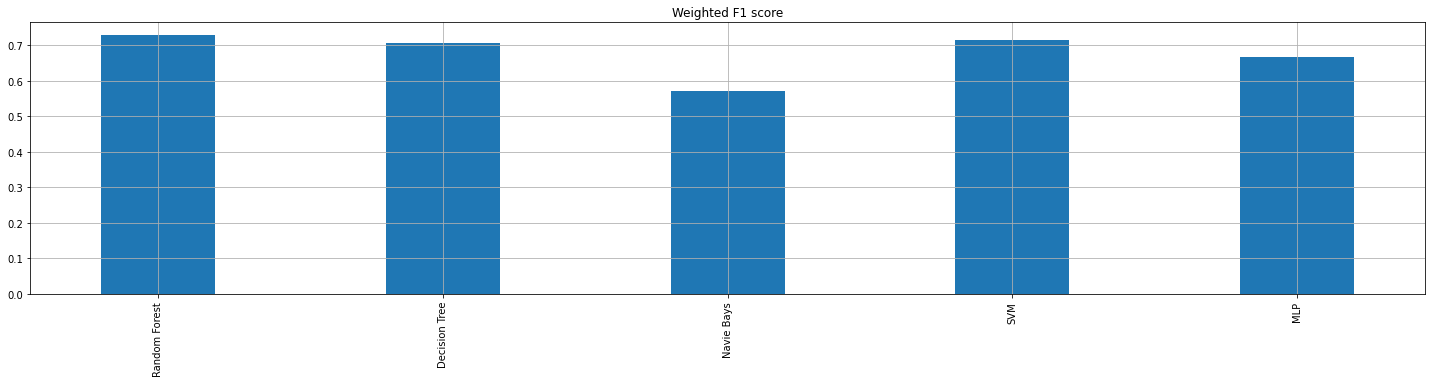

In [ ]:
from matplotlib.pyplot import plot
f, ax = plt.subplots(figsize=(25,5)) # set the size that you'd like (width, height)
main_data["Weighted F1 score"] = main_data['Weighted F1 score'].astype(float)
main_data["Weighted F1 score"] .plot(kind="bar", grid=True , width=0.4,)
plt.title('Weighted F1 score')